# Lanugage Processing

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from polyglot.detect import Detector
from polyglot.detect.base import logger as polyglot_logger
polyglot_logger.setLevel("ERROR")
import warnings
warnings.filterwarnings('ignore')
from utils import *
data_path = "../data/"

## 1. Sentiment Analysis

### 1-0. Join Dataframes

In [2]:
# join the df with the price & superhost
list_df = pd.read_csv(data_path + "listings_detail.csv")
list_df = list_df[['id', 'price', 'host_is_superhost']]
review_df = pd.read_csv(data_path + "reviews_detail.csv")
review_df = review_df[['listing_id', 'comments']]
review_df.rename(columns={'listing_id':'id'}, inplace=True)
join_df = list_df.merge(review_df) # join listings and the review comments
print("Total Sample:", len(join_df))
print(join_df.head())

Total Sample: 848725
     id  price host_is_superhost  \
0  2595  150.0                 f   
1  2595  150.0                 f   
2  2595  150.0                 f   
3  2595  150.0                 f   
4  2595  150.0                 f   

                                            comments  
0  Notre séjour de trois nuits.\nNous avons appré...  
1                                  Great experience.  
2  I've stayed with my friend at the Midtown Cast...  
3  We've been staying here for about 9 nights, en...  
4  We had a wonderful stay at Jennifer's charming...  


### 1-1. English Reviews

In [3]:
comments = join_df["comments"]
eng_comments = [] # store the english reviews only
for c in comments:
    if type(c) is float: continue
    if ("<br>" in c): c.replace("<br>", "")
    try:
        c.encode('utf-8')
        lang = Detector(c, quiet=True)
        if (lang.language.name == "English") and (isinstance(c, str)): # also remove invalid data (non-string)
            eng_comments.append(c.encode('utf8'))
    except: continue 

print ("Total English Reviews:", len(eng_comments))

Total English Reviews: 769558


### 1-2. Sentiment Analysis for SuperHost vs Host

In [4]:
join_df['sentiment'] = join_df['comments'].apply(sentiment_calc)
join_df = join_df[join_df['sentiment'] != None] # drop 'None' lists (failed to get sentiments)
print(join_df.head())

     id  price host_is_superhost  \
0  2595  150.0                 f   
1  2595  150.0                 f   
2  2595  150.0                 f   
3  2595  150.0                 f   
4  2595  150.0                 f   

                                            comments  sentiment  
0  Notre séjour de trois nuits.\nNous avons appré...   0.000000  
1                                  Great experience.   0.800000  
2  I've stayed with my friend at the Midtown Cast...   0.410124  
3  We've been staying here for about 9 nights, en...   0.266875  
4  We had a wonderful stay at Jennifer's charming...   0.518750  


[[Text(0, 0.0, '0'), Text(0, 2.0, '1'), Text(0, 4.0, '2'), Text(0, 6.0, '3')]]

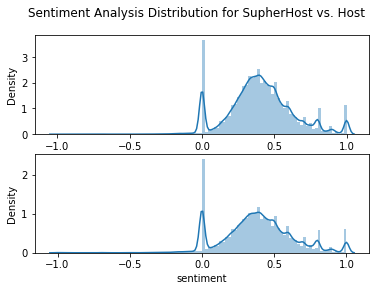

In [15]:
superhost_df = join_df[join_df['host_is_superhost'] == 't'] # get superhost df
host_df = join_df[join_df['host_is_superhost'] == 'f'] # get host df
# plt.hist([superhost_df['sentiment'], host_df['sentiment']], bins = 200, range=[-1.0, 1.0], alpha=0.5, label=['x', 'y'])

fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Sentiment Analysis Distribution for SupherHost vs. Host')
p = sns.distplot(superhost_df['sentiment'], kde=True, bins=100, hist=True, ax=ax1)
p = sns.distplot(host_df['sentiment'], kde=True, bins=100, hist=True, ax=ax2)
p.set(yticklabels=[0,1,2,3,4,5])

### 1-3. Sentiment Analysis for Price Bin